<a href="https://colab.research.google.com/github/veer8023/h/blob/main/HITWICKET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [14]:
import pandas as pd
import numpy as np
data={
    'class':[4,4,5,1,1,2,5,2],
    'Gender':['Female','Male','Male','Female','Male','Female','Female','Male'],
    'Values':[10,3,1,5,7,2,5,10]
}
dataframe=pd.DataFrame(data)
dataframe

,class,Gender,Values
0,4,Female,10
1,4,Male,3
2,5,Male,1
3,1,Female,5
4,1,Male,7
5,2,Female,2
6,5,Female,5
7,2,Male,10


In [2]:
import pandas as pd
import numpy as np
data={
    'class':[4,4,5,1,1,2,5,2],
    'Gender':['Female','Male','Male','Female','Male','Female','Female','Male'],
    'Values':[10,3,1,5,7,2,5,10]
}
dataframe=pd.DataFrame(data)
dataframe

dataframe['male']=dataframe['Gender'].apply(lambda x:1 if x=='Male' else 0)
dataframe['female']=dataframe['Gender'].apply(lambda x:1 if x=='female' else 0)
dataframe

dataframe.sort_values('Values',ascending=True)


,class,Gender,Values,male,female
2,5,Male,1,1,0
5,2,Female,2,0,0
1,4,Male,3,1,0
3,1,Female,5,0,0
6,5,Female,5,0,0
4,1,Male,7,1,0
0,4,Female,10,0,0
7,2,Male,10,1,0


In [4]:
df_sorted = dataframe.sort_values(by=['class', 'Values'], ascending=[True, False])
print(df_sorted)

   class  Gender  Values  male  female
4      1    Male       7     1       0
3      1  Female       5     0       0
7      2    Male      10     1       0
5      2  Female       2     0       0
0      4  Female      10     0       0
1      4    Male       3     1       0
6      5  Female       5     0       0
2      5    Male       1     1       0


In [5]:
grouped = dataframe.groupby(['class', 'Gender'])['Values'].nunique().reset_index()
print(grouped)

   class  Gender  Values
0      1  Female       1
1      1    Male       1
2      2  Female       1
3      2    Male       1
4      4  Female       1
5      4    Male       1
6      5  Female       1
7      5    Male       1


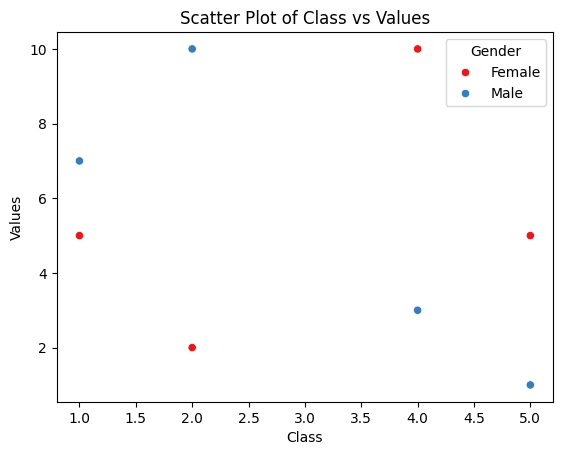

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x='class', y='Values', hue='Gender', palette='Set1', data=dataframe)
plt.title('Scatter Plot of Class vs Values')
plt.xlabel('Class')
plt.ylabel('Values')

plt.legend(title='Gender')
plt.show()

In [11]:
reshaped = dataframe.pivot_table(values='Values', index='class', columns='Gender', aggfunc='first').reset_index()
reshaped = reshaped.rename_axis(None, axis=1).fillna('-')
print(reshaped)

   class  Female  Male
0      1       5     7
1      2       2    10
2      4      10     3
3      5       5     1


In [17]:
data1={
    'Category':[1,1,2],
    'x_variable':[1900,1590,995],
    'y_variable':[1875,1770,1205]
}
dataframe1=pd.DataFrame(data1)
dataframe1


,Category,x_variable,y_variable
0,1,1900,1875
1,1,1590,1770
2,2,995,1205


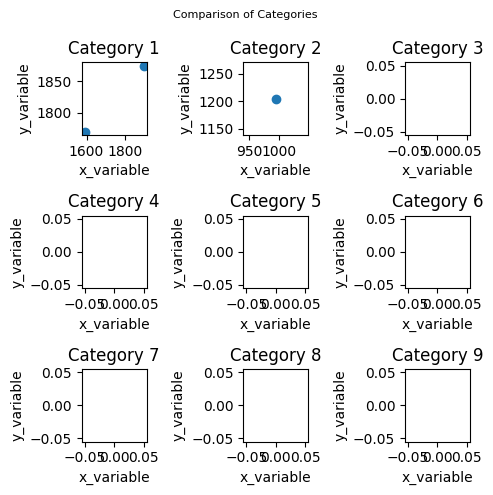

In [19]:
table_to_plot=pd.DataFrame(dataframe1)
import matplotlib.pyplot as plt

fig, axes = plt.subplots(3, 3, figsize=(5, 5))
fig.suptitle('Comparison of Categories', fontsize=8)

for category in range(1, 10):
    row = (category - 1) // 3
    col = (category - 1) % 3

    subset = table_to_plot[table_to_plot['Category'] == category]
    axes[row, col].scatter(subset['x_variable'], subset['y_variable'])
    axes[row, col].set_title(f'Category {category}')
    axes[row, col].set_xlabel('x_variable')
    axes[row, col].set_ylabel('y_variable')

plt.tight_layout()
plt.show()

In [20]:
import numpy as np

def assign_interval(x, bins):
    return np.digitize(x, bins)

for col in ['x_variable', 'y_variable']:
    bins = np.linspace(table_to_plot[col].min(), table_to_plot[col].max(), 4)
    table_to_plot[f'{col}_interval'] = assign_interval(table_to_plot[col], bins[1:-1])
    table_to_plot[f'{col}_interval'] = table_to_plot[f'{col}_interval'].map({1: 'Low', 2: 'Medium', 3: 'High'})

print(table_to_plot.head())

   Category  x_variable  y_variable x_variable_interval y_variable_interval
0         1        1900        1875              Medium              Medium
1         1        1590        1770                 Low              Medium
2         2         995        1205                 NaN                 NaN


In [ ]:
Lab

In [ ]:
data1={
    'Category':[1,1,2],
    'x_variable':[1900,1590,995],
    'y_variable':[1875,1770,1205]
}
dataframe1=pd.DataFrame(data1)
dataframe1

,Category,x_variable,y_variable
0,1,1900,1875
1,1,1590,1770
2,2,995,1205


In [ ]:
import pandas as pd
import numpy as np


data1 = {
    'Category': [1, 1, 2],
    'x_variable': [1900, 1590, 995],
    'y_variable': [1875, 1770, 1205]
}


dataframe1 = pd.DataFrame(data1)


x_bins = np.linspace(dataframe1['x_variable'].min(), dataframe1['x_variable'].max(), 4)
y_bins = np.linspace(dataframe1['y_variable'].min(), dataframe1['y_variable'].max(), 4)


x_labels = [f'({x_bins[i]:.0f},{x_bins[i+1]:.0f})' for i in range(len(x_bins)-1)]
y_labels = [f'({y_bins[i]:.0f},{y_bins[i+1]:.0f})' for i in range(len(y_bins)-1)]


dataframe1['x_range'] = pd.cut(dataframe1['x_variable'], bins=x_bins, labels=x_labels, include_lowest=True)
dataframe1['y_range'] = pd.cut(dataframe1['y_variable'], bins=y_bins, labels=y_labels, include_lowest=True)

print(dataframe1)


   Category  x_variable  y_variable      x_range      y_range
0         1        1900        1875  (1598,1900)  (1652,1875)
1         1        1590        1770  (1297,1598)  (1652,1875)
2         2         995        1205   (995,1297)  (1205,1428)
